In [22]:

# List files in /content/ to find the correct dataset name
content_files = os.listdir('/content/')
print(f"Files in /content/: {content_files}")

# Try to find a CSV file that looks like the dataset
csv_files = [f for f in content_files if f.endswith('.csv') and ('dataset' in f.lower() or 'data' in f.lower())]

if csv_files:
    # Assuming the first found CSV is the correct one
    file_path = os.path.join('/content/', csv_files[0])
    df = pd.read_csv(file_path)
    print(f"Dataset '{csv_files[0]}' loaded successfully.")
else:
    print("No suitable CSV dataset file found in /content/.")

Files in /content/: ['.config', 'Dataset .csv', '.ipynb_checkpoints', 'sample_data']
Dataset 'Dataset .csv' loaded successfully.


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Sentiment
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Positive
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Positive
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Positive
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Positive
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Positive
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Positive
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Neutral
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Positive


In [59]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Sentiment
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Positive
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Positive
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Positive
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Positive
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Positive


In [60]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Sentiment
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Positive
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Positive
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Neutral
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Positive
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Positive


In [61]:
df.isnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Sentiment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
df.notnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Sentiment
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9547,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9548,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9549,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


Level-1
Task-1


In [63]:
#Determine the top three most common cuisines in the dataset.
df_cuisines_exploded = df['Cuisines'].str.split(', ').explode()
print("Exploded Cuisines:")
print(df_cuisines_exploded.head())

Exploded Cuisines:
0      French
0    Japanese
0    Desserts
1    Japanese
2     Seafood
Name: Cuisines, dtype: object


In [65]:
import pandas as pd
import numpy as np
import re

file_name = "Dataset .csv"
df = pd.read_csv(file_name)

cuisines_series = df['Cuisines'].dropna().str.split(', ')

all_cuisines = [cuisine for sublist in cuisines_series for cuisine in sublist]

cuisine_counts = pd.Series(all_cuisines).value_counts()

top_3_cuisines = cuisine_counts.head(3)
top_3_cuisine_names = top_3_cuisines.index.tolist()

total_restaurants = len(df)

top_cuisines_percentage = {}
for cuisine in top_3_cuisine_names:
    count = df['Cuisines'].dropna().str.contains(r'\b' + re.escape(cuisine) + r'\b', case=False, na=False, regex=True).sum()
    percentage = (count / total_restaurants) * 100
    top_cuisines_percentage[cuisine] = percentage

results_df = pd.DataFrame(list(top_cuisines_percentage.items()), columns=['Cuisine', 'Percentage of Restaurants'])
results_df['Count'] = top_3_cuisines.values
results_df = results_df.set_index('Cuisine').sort_values(by='Count', ascending=False)
results_df['Percentage of Restaurants'] = results_df['Percentage of Restaurants'].round(2).astype(str) + '%'

print("Top 3 Cuisines and their respective restaurant counts and percentages:")
print(results_df)

results_df.to_csv("top_3_cuisines_percentage.csv")

Top 3 Cuisines and their respective restaurant counts and percentages:
             Percentage of Restaurants  Count
Cuisine                                      
North Indian                    41.46%   3960
Chinese                         28.61%   2735
Fast Food                        20.8%   1986


In [66]:
restaurants_per_city = df.groupby('City').size()
print("Number of restaurants per city:")
print(restaurants_per_city.head())

Number of restaurants per city:
City
Abu Dhabi    20
Agra         20
Ahmedabad    21
Albany       20
Allahabad    20
dtype: int64


Task 2-
#City analysis

In [67]:
#City with highest number of restaraunts
restaurants_per_city = df.groupby('City').size()
city_with_most_restaurants = restaurants_per_city.idxmax()
print(f"City with the most restaurants: {city_with_most_restaurants}")

City with the most restaurants: New Delhi


In [68]:
#Calculate the average rating for restaurants in each city.

average_rating_per_city = df.groupby('City')['Aggregate rating'].mean()
print("Average rating per city:")
print(average_rating_per_city.head())

Average rating per city:
City
Abu Dhabi    4.300000
Agra         3.965000
Ahmedabad    4.161905
Albany       3.555000
Allahabad    3.395000
Name: Aggregate rating, dtype: float64


In [69]:
#Determine the city with the highest average rating
city_with_highest_avg_rating = average_rating_per_city.idxmax()
print(f"City with the highest average rating: {city_with_highest_avg_rating}")

City with the highest average rating: Inner City


Task-3
#Price Range Distribution

In [70]:
#Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.


/tmp/ipython-input-912020595.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price range', data=df, palette='viridis')


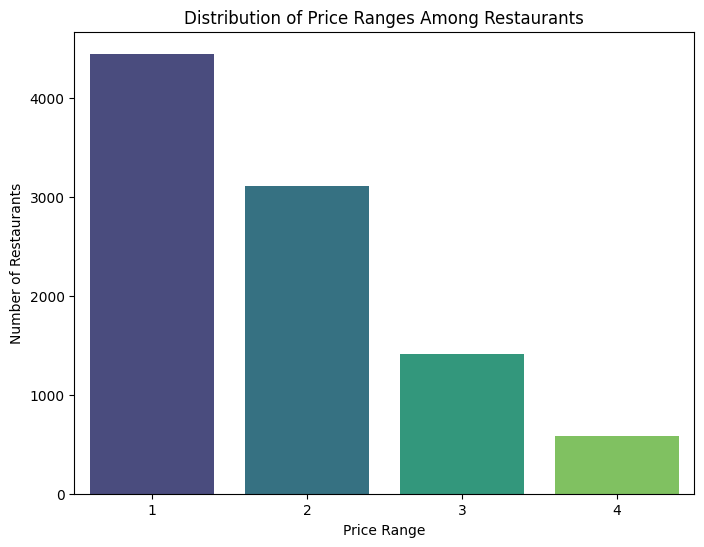

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Price range', data=df, palette='viridis')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()

In [72]:
#Calculate the percentage of restaurants in each price range category.

price_range_counts = df['Price range'].value_counts()
total_restaurants = len(df)
percentage_price_range = (price_range_counts / total_restaurants) * 100
print("Percentage of restaurants in each price range category:")
display(percentage_price_range)

Percentage of restaurants in each price range category:


,count
Price range,
1,46.529159
2,32.593446
3,14.741912
4,6.135483


Task 4
#Online Delivery


In [73]:
#Determine the Percentage of restauarants that offer online delivery
online_delivery_count = df[df['Has Online delivery'] == 'Yes'].shape[0]
total_restaurants = len(df)
percentage_online_delivery = (online_delivery_count / total_restaurants) * 100

print(f"Percentage of restaurants that offer online delivery: {percentage_online_delivery:.2f}%")

Percentage of restaurants that offer online delivery: 25.66%


In [74]:
#compare the average ratings of restaurants with and without online delivery
average_ratings_by_online_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()

print("Average ratings of restaurants with and without online delivery:")
display(average_ratings_by_online_delivery)

Average ratings of restaurants with and without online delivery:


,Aggregate rating
Has Online delivery,
No,2.465296
Yes,3.248837


##LEVEL 2

Task-1
#Restauarant Ratings

In [75]:
#if there are any restaurant chains present in the dataset.

restaurant_name_counts = df['Restaurant Name'].value_counts()
restaurant_chains = restaurant_name_counts[restaurant_name_counts > 1]

if not restaurant_chains.empty:
    print("Restaurant chains identified (Restaurant Name and number of branches):")
    display(restaurant_chains)
else:
    print("No restaurant chains found in the dataset.")

Restaurant chains identified (Restaurant Name and number of branches):


,count
Restaurant Name,
Cafe Coffee Day,83
Domino's Pizza,79
Subway,63
Green Chick Chop,51
McDonald's,48
...,...
Fish Streat,2
Adarsh Kulfi,2
Senorita's,2


In [76]:
#Analyze the ratings and popularity of different restaurant chains.
chain_restaurants_df = df[df['Restaurant Name'].isin(restaurant_chains.index)]

print("First 5 rows of the new DataFrame containing only chain restaurants:")
display(chain_restaurants_df.head())
print(f"Total number of chain restaurants: {len(chain_restaurants_df)}")

First 5 rows of the new DataFrame containing only chain restaurants:


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.9,Dark Green,Excellent,1070
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294
35,6601589,Coco Bambu,30,Bras�_lia,"Bras�_lia Shopping - Piso 2, SCN 5, Bloco A, A...","Bras�_lia Shopping, Asa Norte","Bras�_lia Shopping, Asa Norte, Bras�_lia",-47.889000,-15.786500,International,...,Brazilian Real(R$),No,No,No,No,4,4.2,Green,Very Good,17
39,6600427,Coco Bambu,30,Bras�_lia,"SCES, Trecho 2, Conjunto 13/36, Setor de Clube...",Setor De Clubes Esportivos Sul,"Setor De Clubes Esportivos Sul, Bras�_lia",-47.868500,-15.819000,International,...,Brazilian Real(R$),No,No,No,No,4,4.9,Dark Green,Excellent,30


Total number of chain restaurants: 2839


Task-2
#Cuisine Combination

In [77]:
#identify the most common cuisines combinations of clusters in the dataset
cuisine_combination_counts = df['Cuisines'].value_counts()
print("Top 10 most common cuisine combinations:")
display(cuisine_combination_counts.head(10))

Top 10 most common cuisine combinations:


,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
Cafe,299
Bakery,218
"North Indian, Mughlai, Chinese",197
"Bakery, Desserts",170


In [78]:
#3.Determine if each cuisine combinations tend to have higher ratings.
average_rating_by_cuisine_combination = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average 'Aggregate rating' for each cuisine combination (Top 10):")
display(average_rating_by_cuisine_combination.head(10))

Average 'Aggregate rating' for each cuisine combination (Top 10):


,Aggregate rating
Cuisines,
"Burger, Bar Food, Steak",4.9
"American, Burger, Grill",4.9
"American, Caribbean, Seafood",4.9
"American, Coffee and Tea",4.9
"Mexican, American, Healthy Food",4.9
"Italian, Bakery, Continental",4.9
"BBQ, Breakfast, Southern",4.9
"European, German",4.9
"Hawaiian, Seafood",4.9


In [79]:
cuisine_combination_counts = df['Cuisines'].value_counts()
print("Top 10 most common cuisine combinations:")
display(cuisine_combination_counts.head(10))

Top 10 most common cuisine combinations:


,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
Cafe,299
Bakery,218
"North Indian, Mughlai, Chinese",197
"Bakery, Desserts",170


Task-3
#Geographic Aalysis


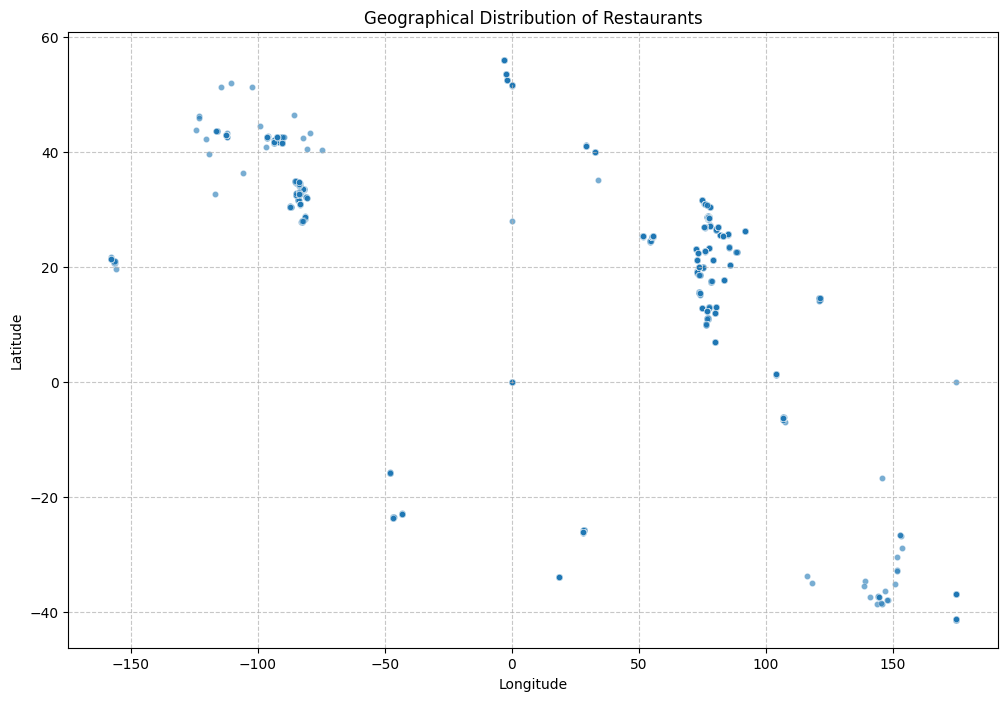

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.6, s=20)
plt.title('Geographical Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Task 4
#Restaurant Chains

In [81]:
#Identify if there are any restaurant chains present in the dataset
restaurant_name_counts = df['Restaurant Name'].value_counts()
restaurant_chains = restaurant_name_counts[restaurant_name_counts > 1]

if not restaurant_chains.empty:
    print("Restaurant chains identified (Restaurant Name and number of branches):")
    display(restaurant_chains)
else:
    print("No restaurant chains found in the dataset.")

Restaurant chains identified (Restaurant Name and number of branches):


,count
Restaurant Name,
Cafe Coffee Day,83
Domino's Pizza,79
Subway,63
Green Chick Chop,51
McDonald's,48
...,...
Fish Streat,2
Adarsh Kulfi,2
Senorita's,2


In [82]:
#analyze the ratings and popularity of different restaurant chains.
# Calculate average rating for each restaurant chain
average_rating_chains = df[df['Restaurant Name'].isin(restaurant_chains.index)].groupby('Restaurant Name')['Aggregate rating'].mean()

chain_analysis_df = pd.DataFrame(restaurant_chains)
chain_analysis_df.columns = ['Number of Branches']

chain_analysis_df = chain_analysis_df.merge(average_rating_chains, left_index=True, right_index=True)
chain_analysis_df.rename(columns={'Aggregate rating': 'Average Rating'}, inplace=True)

print("Restaurant Chains: Number of Branches and Average Rating:")
display(chain_analysis_df.sort_values(by='Number of Branches', ascending=False).head(10))

Restaurant Chains: Number of Branches and Average Rating:


,Number of Branches,Average Rating
Restaurant Name,,
Cafe Coffee Day,83,2.419277
Domino's Pizza,79,2.740506
Subway,63,2.907937
Green Chick Chop,51,2.672549
McDonald's,48,3.339583
Keventers,34,2.870588
Pizza Hut,30,3.320000
Giani,29,2.689655
Baskin Robbins,28,1.860714


LEVEL-3

TAsk-1
#Restaurant Reviews


In [103]:
#Analyze the text reviews to identify the most common positive and negative keywords.

In [104]:
# Map 'Rating text' to 'Sentiment' categories
def get_sentiment(rating_text):
    if rating_text in ['Excellent', 'Very Good']:
        return 'Positive'
    elif rating_text in ['Good', 'Average']:
        return 'Neutral'
    elif rating_text in ['Poor', 'Not rated']:
        return 'Negative'
    return 'Unknown'

df['Sentiment'] = df['Rating text'].apply(get_sentiment)
print("Created 'Sentiment' column based on 'Rating text'.")
print(df[['Rating text', 'Sentiment']].head())

Created 'Sentiment' column based on 'Rating text'.
  Rating text Sentiment
0   Excellent  Positive
1   Excellent  Positive
2   Very Good  Positive
3   Excellent  Positive
4   Excellent  Positive


In [105]:
import nltk
import string
nltk.download('stopwords')
print("NLTK stopwords downloaded and modules imported.")

NLTK stopwords downloaded and modules imported.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
#Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [107]:
import re
from nltk.corpus import stopwords

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\d+', '', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

df['Cleaned_Rating_Text'] = df['Rating text'].apply(clean_text)
print("Created 'Cleaned_Rating_Text' column by applying cleaning function.")
print(df[['Rating text', 'Cleaned_Rating_Text']].head())

Created 'Cleaned_Rating_Text' column by applying cleaning function.
  Rating text Cleaned_Rating_Text
0   Excellent           excellent
1   Excellent           excellent
2   Very Good                good
3   Excellent           excellent
4   Excellent           excellent


In [108]:
df['Review Length'] = df['Cleaned_Rating_Text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
print("Created 'Review Length' column.")
print(df[['Rating text', 'Cleaned_Rating_Text', 'Review Length']].head())

Created 'Review Length' column.
  Rating text Cleaned_Rating_Text  Review Length
0   Excellent           excellent              1
1   Excellent           excellent              1
2   Very Good                good              1
3   Excellent           excellent              1
4   Excellent           excellent              1


In [109]:
overall_average_review_length = df['Review Length'].mean()
print(f"Overall average review length: {overall_average_review_length:.2f} words")

Overall average review length: 1.00 words


In [110]:
average_review_length_by_rating = df.groupby('Aggregate rating')['Review Length'].mean()
print("Average review length for each 'Aggregate rating' group:")
display(average_review_length_by_rating)

Average review length for each 'Aggregate rating' group:


,Review Length
Aggregate rating,
0.0,1.0
1.8,1.0
1.9,1.0
2.0,1.0
2.1,1.0
2.2,1.0
2.3,1.0
2.4,1.0
2.5,1.0


Task-2
#Vote Analysis

In [92]:
max_votes = df['Votes'].max()
restaurants_with_max_votes = df[df['Votes'] == max_votes]

min_votes = df['Votes'].min()
restaurants_with_min_votes = df[df['Votes'] == min_votes]

print("Restaurants with the HIGHEST number of votes:")
display(restaurants_with_max_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])

print("\nRestaurants with the LOWEST number of votes:")
display(restaurants_with_min_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])

Restaurants with the HIGHEST number of votes:


,Restaurant Name,Votes,Aggregate rating
728,Toit,10934,4.8



Restaurants with the LOWEST number of votes:


,Restaurant Name,Votes,Aggregate rating
69,Cantinho da Gula,0,0.0
874,The Chaiwalas,0,0.0
879,Fusion Food Corner,0,0.0
880,Punjabi Rasoi,0,0.0
887,Baskin Robbin,0,0.0
...,...,...,...
9044,6 Packs Momos,0,0.0
9098,Cafe' Wow,0,0.0
9099,Chef's Basket Pop Up Caf��,0,0.0
9103,The Hangout-Deli,0,0.0


In [93]:
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"Correlation between 'Votes' and 'Aggregate rating': {correlation:.2f}")

Correlation between 'Votes' and 'Aggregate rating': 0.31


Task 3
##Price range Vs Online Delivery and Table Booking

In [96]:
#Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [100]:
online_delivery_by_price = df.groupby(['Price range', 'Has Online delivery']).size().unstack(fill_value=0)
online_delivery_by_price['Total'] = online_delivery_by_price['Yes'] + online_delivery_by_price['No']
online_delivery_by_price['Percentage Online Delivery'] = (online_delivery_by_price['Yes'] / online_delivery_by_price['Total']) * 100

print("Percentage of restaurants offering online delivery within each price range:")
display(online_delivery_by_price[['Percentage Online Delivery']].round(2))

Percentage of restaurants offering online delivery within each price range:


Has Online delivery,Percentage Online Delivery
Price range,
1,15.77
2,41.31
3,29.19
4,9.04


In [98]:
table_booking_by_price = df.groupby(['Price range', 'Has Table booking']).size().unstack(fill_value=0)
table_booking_by_price['Total'] = table_booking_by_price['Yes'] + table_booking_by_price['No']
table_booking_by_price['Percentage Table Booking'] = (table_booking_by_price['Yes'] / table_booking_by_price['Total']) * 100

print("Percentage of restaurants offering table booking within each price range:")
display(table_booking_by_price[['Percentage Table Booking']].round(2))

Percentage of restaurants offering table booking within each price range:


Has Table booking,Percentage Table Booking
Price range,
1,0.02
2,7.68
3,45.74
4,46.76


In [101]:
#Determine if higher-priced restaurants are more likely to offer these services.

In [102]:
combined_analysis_df = pd.DataFrame({
    'Online Delivery (%)': online_delivery_by_price['Percentage Online Delivery'].round(2),
    'Table Booking (%)': table_booking_by_price['Percentage Table Booking'].round(2)
})

print("Combined Analysis of Online Delivery and Table Booking by Price Range:")
display(combined_analysis_df)

print("\nInterpretation:")
print("Price Range 1 (cheapest) and 2 have a higher percentage of online delivery restaurants compared to table booking.")
print("Price Range 3 and 4 (most expensive) show a significantly higher percentage of restaurants offering table booking compared to online delivery.")
print("This suggests that more affordable restaurants tend to prioritize online delivery, while higher-priced restaurants are more likely to offer table booking.")

Combined Analysis of Online Delivery and Table Booking by Price Range:


,Online Delivery (%),Table Booking (%)
Price range,,
1,15.77,0.02
2,41.31,7.68
3,29.19,45.74
4,9.04,46.76



Interpretation:
Price Range 1 (cheapest) and 2 have a higher percentage of online delivery restaurants compared to table booking.
Price Range 3 and 4 (most expensive) show a significantly higher percentage of restaurants offering table booking compared to online delivery.
This suggests that more affordable restaurants tend to prioritize online delivery, while higher-priced restaurants are more likely to offer table booking.
